## Imports

In [1]:
import numpy as np

import sys

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter

from astropy import units as u
from astropy import constants as const
from astropy.table import QTable

from pathlib import Path
import os

import import_ipynb
from Analysis_functions import extract_data, extract_data_short, means_calc, stream_crossing, easy_interpolate, \
     stream_alignment_step1, stream_alignment_step2, stream_shape, binned_relative_difference, \
     inertia_tensor, Iii, Iij, aspect_ratios

from Visualization_functions import snapshots_plot, anim_disc, anim_3d, anim_ComparetoTraceback

sys.path.insert(0, '/home/emelie/Desktop/Codes/PETAR/PeTar-master/tools/')
from analysis import *

importing Jupyter notebook from Analysis_functions.ipynb
importing Jupyter notebook from Visualization_functions.ipynb


In [2]:
plt.rcParams.update({'xtick.labelsize':20, 'ytick.labelsize':20, 'axes.titlesize':26, 
                     'axes.grid':True, 'axes.labelsize':24, 'legend.fontsize':20})

# Trace back of Boo III Orbit, 3 particles, 1Gyr back in time

In [3]:
trace_back_data, trace_back_header, trace_back_extra, trace_back_hist_data = extract_data(r'btest2_data', r'Petar_back_test2', 125, 1)

print(trace_back_data.shape)
print(trace_back_extra.shape)
print(trace_back_header.shape)

trace_back_halfmass_r = trace_back_extra[0, :]
#print(trace_back_halfmass_r)

print(np.max(trace_back_halfmass_r))
print(np.min(trace_back_halfmass_r))

v_mean_trace_back, r_mean_trace_back = means_calc(trace_back_header)

print(v_mean_trace_back.shape)
print(r_mean_trace_back.shape)

Number of particles is conserved: True
(3, 21, 126)
(4, 126)
(8, 126)
0.014934474300677339
0.0006077755205047432
(126,)
(126,)


### Plotting mean velocities

In [4]:
#means_plots(which='vel', header_array=trace_back_header, mean=v_mean_trace_back, t_max=1000, run='Trace_back', 
#            fig_width=14, fig_height=10, save=False)

In [5]:
#means_plots(which='pos', header_array=trace_back_header, mean=r_mean_trace_back, t_max=1000, run='Trace_back', 
#            fig_width=14, fig_height=10, save=False)

In [6]:
#snapshots = [0, 30, 60, -1]
#snapshots_plot(trace_back_data, snapshots, 11.0e1, 11.0e1, (11, 20), 5, 'Trace_back', save=False)

In [7]:
#anim_3d(trace_back_data, trace_back_header, tstep=8, nsteps=125, lims=15.0e1, fsize=(10, 10), 
#        marker_size=10, tx=-0.5e2, ty=1.0e2, tz=1.0e2, format_type='mp4', fps=10, run='Trace_back_run')

# Trace forward of Boo III Orbit, 3 particles, 8Gyr forward in time

In [4]:
trace_forward_data, trace_forward_header, trace_forward_extra, trace_forward_hist_data = extract_data(r'Trace_forward_fiducial_run_data', r'Trace_forward_fiducial_run', 2000, 1)

print(trace_forward_data.shape)
print(trace_forward_extra.shape)
print(trace_forward_header.shape)

trace_forward_halfmass_r = trace_forward_extra[0, :]
#print(trace_forward_halfmass_r)

print(np.max(trace_forward_halfmass_r))
print(np.min(trace_forward_halfmass_r))

v_mean_trace_forward, r_mean_trace_forward = means_calc(trace_forward_header)

print(v_mean_trace_forward.shape)
print(r_mean_trace_forward.shape)

Number of particles is conserved: True
(3, 21, 2001)
(4, 2001)
(8, 2001)
0.06259852657480973
0.0001785783876411207
(2001,)
(2001,)


### Plotting mean velocities

In [9]:
#means_plots(which='vel', header_array=trace_forward_header, mean=v_mean_petar_btest, t_max=1000, run='Trace_forward', 
#            fig_width=14, fig_height=10, save=False)

In [10]:
#means_plots(which='pos', header_array=trace_forward_header, mean=r_mean_petar_btest, t_max=1000, run='Trace_forward', 
#            fig_width=14, fig_height=10, save=False)

In [11]:
#snapshots = [0, 25, 50, -1]
#snapshots_plot(trace_forward_data, snapshots, 11.0e1, 11.0e1, (11, 20), 5, 'Trace forward', save=False)

In [12]:
#anim_3d(trace_forward_data, trace_forward_header, tstep=4, nsteps=2000, lims=17.5e1, fsize=(10, 10), 
#        marker_size=10, tx=-0.5e2, ty=1.0e2, tz=1.0e2, format_type='mp4', fps=8, run='Trace_forward_run')

## Reading in high-mass data to correct the extra lengths

### $M_{dyn} = 13 \,$M$_{\odot}$

In [5]:
%%time
#high_mass_mod_data, high_mass_mod_header, high_mass_mod_extra, high_mass_mod_hist_data = extract_data(r'high_mass_run_data', 
#                                                                                                                  r'High_mass_run', 39, 1)

high_mass_mod_data, high_mass_mod_header, high_mass_mod_extra = extract_data_short(r'high_mass_run_data', 
                                                                                    r'High_mass_run', 39)

in_high_mass_mod_data, in_high_mass_mod_header, in_high_mass_mod_extra = extract_data_short(r'high_mass_run_data', 
                                                                                            r'High_mass_run', 0)

print(high_mass_mod_data.shape)
print(high_mass_mod_extra.shape)
print(high_mass_mod_header.shape)
print(high_mass_mod_header[:, -1])

high_mass_mod_halfmass_r = high_mass_mod_extra[0, :]
print(high_mass_mod_halfmass_r)

print(np.max(high_mass_mod_halfmass_r))
print(np.min(high_mass_mod_halfmass_r))

v_mean_high_mass_mod, r_mean_high_mass_mod = means_calc(high_mass_mod_header)

print(v_mean_high_mass_mod.shape)
print(r_mean_high_mass_mod.shape)

(1000066, 21, 1)
(4, 1)
(8, 1)
[ 1.00006600e+06  4.99200000e+03  3.64330703e+01  1.54212291e+02
 -4.55233670e+01  6.29685582e+00  2.67396837e+01  1.52785348e+01]
[0.16447482]
0.16447481677218076
0.16447481677218076
(1,)
(1,)
CPU times: user 34.5 s, sys: 1.36 s, total: 35.9 s
Wall time: 35.6 s


## Looking at the orbit

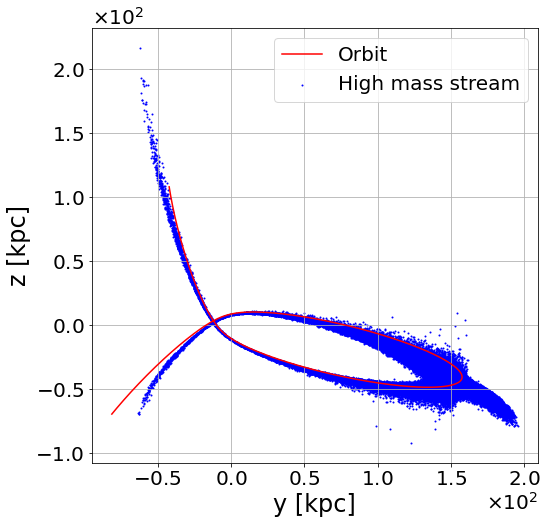

In [8]:
fig_orb, ax_orb = plt.subplots(figsize=(8, 8))
#ax_orb = fig_orb.add_subplot(projection='3d', computed_zorder=False)

#u = np.linspace(0, 2 * np.pi, 100)
#v = np.linspace(0, np.pi, 100)


#x_bulge = 1.500 * np.outer(np.cos(u), np.sin(v))
#y_bulge = 1.500 * np.outer(np.sin(u), np.sin(v))
#z_bulge = 1.500 * np.outer(np.ones(np.size(u)), np.cos(v))

#x_disc = 14.490 * np.outer(np.cos(u), np.sin(v))
#y_disc = 14.490 * np.outer(np.sin(u), np.sin(v))
#z_disc = 0.300 * np.outer(np.ones(np.size(u)), np.cos(v))

# Before: 40:109
low_tstep = 800
high_tstep = 1780

ax_orb.plot(trace_forward_header[3, low_tstep:high_tstep], trace_forward_header[4, low_tstep:high_tstep], 
            color='r', zorder=10, label='Orbit') 
            #trace_forward_header[4, low_tstep:high_tstep], color='b')

ax_orb.scatter(high_mass_mod_data[:, 2], high_mass_mod_data[:, 3], c='b', zorder=0, s=1, 
               label='High mass stream')

#sc = ax_orb.scatter(trace_forward_header[2, 600:1900], trace_forward_header[3, 600:1900], 
#            trace_forward_header[4, 600:1900], c=trace_forward_header[1, 600:1900], cmap='spring')

#plt.colorbar(sc)
ax_orb.set_xlabel('y [kpc]') #, labelpad=15)
ax_orb.set_ylabel('z [kpc]') #, labelpad=15)
#ax_orb.set_zlabel('z [kpc]', labelpad=5)
ax_orb.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax_orb.xaxis.get_major_formatter().set_powerlimits((0, 0))
ax_orb.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax_orb.yaxis.get_major_formatter().set_powerlimits((0, 0))
#ax_orb.zaxis.set_major_formatter(ScalarFormatter(useMathText=True))
#ax_orb.zaxis.get_major_formatter().set_powerlimits((0, 0))

ax_orb.legend()

#ax_orb.plot_surface(x_bulge, y_bulge, z_bulge, color='grey', alpha=0.5)
#ax_orb.plot_surface(x_disc, y_disc, z_disc, color='grey', alpha=0.5)

#ax_orb.view_init(4, 15)

plt.show()

## Finding crossing

orbit_crossing = stream_crossing(trace_forward_header[:, 600:1900], 5e6, 1e6)
print(orbit_crossing)

orbit_pos = run_petar_trace_forward_header[2:5, 600:1900].T

difference_to_crossing = orbit_pos - orbit_crossing[0, :]
distance_to_crossing = np.sqrt(np.sum(difference_to_crossing**2, axis=1))

close_orbit_pos = distance_to_crossing<=5e3
close_pos = orbit_pos[close_orbit_pos]
print(np.shape(close_pos))

fig_orb2 = plt.figure(figsize=(10, 8))
ax_orb2 = fig_orb2.add_subplot(projection='3d', computed_zorder=False)

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)


x_bulge = 1.500 * np.outer(np.cos(u), np.sin(v))
y_bulge = 1.500 * np.outer(np.sin(u), np.sin(v))
z_bulge = 1.500 * np.outer(np.ones(np.size(u)), np.cos(v))

x_disc = 14.490 * np.outer(np.cos(u), np.sin(v))
y_disc = 14.490 * np.outer(np.sin(u), np.sin(v))
z_disc = 0.300 * np.outer(np.ones(np.size(u)), np.cos(v))
# Before: 40:109
#ax_orb.plot(run_petar_trace_forward_header[2, 650:], run_petar_trace_forward_header[3, 650:], 
#            run_petar_trace_forward_header[4, 650:], color='b')

sc = ax_orb2.scatter(run_petar_trace_forward_header[2, 650:], run_petar_trace_forward_header[3, 650:], 
                     run_petar_trace_forward_header[4, 650:], c=run_petar_trace_forward_header[1, 650:], 
                     cmap='spring', s=10)

plt.colorbar(sc)

ax_orb2.scatter(orbit_crossing[0, 0], orbit_crossing[0, 1], orbit_crossing[0, 2], c='b', marker='x', s=20)
ax_orb2.scatter(close_pos[:, 0], close_pos[:, 1], close_pos[:, 2], c='r', s=10)


ax_orb2.set_xlabel('x [kpc]', labelpad=15)
ax_orb2.set_ylabel('y [kpc]', labelpad=15)
ax_orb2.set_zlabel('z [kpc]', labelpad=5)
ax_orb2.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax_orb2.xaxis.get_major_formatter().set_powerlimits((0, 0))
ax_orb2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax_orb2.yaxis.get_major_formatter().set_powerlimits((0, 0))
ax_orb2.zaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax_orb2.zaxis.get_major_formatter().set_powerlimits((0, 0))

ax_orb2.plot_surface(x_bulge, y_bulge, z_bulge, color='grey', alpha=0.5)
ax_orb2.plot_surface(x_disc, y_disc, z_disc, color='grey', alpha=0.5)

#ax_orb2.set_xlim(xmin=-0.0e2, xmax=0.4e2)
#ax_orb2.set_ylim(ymin=-0.1e2, ymax=0.0e2)
#ax_orb2.set_zlim(zmin=-0.05e2, zmax=0.05e2)

ax_orb2.view_init(4, 15)

plt.show()

### Constructing orbit data array

In [6]:
low_tstep = 800
high_tstep = 1780

In [11]:
# With all snapshots: high_mass_mod_data[:, 3, -1]
upper_part_mask = np.where(high_mass_mod_data[:, 3] == np.max(high_mass_mod_data[:, 3]))[0]
# Position (x, y, z, vx, vy, vz) of highest stream particle
upper_part_pos = high_mass_mod_data[upper_part_mask, 1:7].flatten() 
upper_part_pos = np.concatenate([upper_part_pos, [1]])
print(np.shape(upper_part_pos))
# Highest orbit particle is in the first particle I include
# Getting position and velocity of highest orbit particle
upper_orb_part = trace_forward_data[0, 1:7, low_tstep]
upper_orb_part = np.concatenate([upper_orb_part, [1]])
print(np.shape(upper_orb_part))

high_mass_orbit_extension = np.concatenate([upper_part_pos[np.newaxis, :], upper_orb_part[np.newaxis, :]], 
                                             axis=0)
print(np.shape(high_mass_orbit_extension))

(7,)
(7,)
(2, 7)


In [12]:
# Interpolate more points between these two points
for i in range(8):
        #print(i)
        # Roll particles to get x1-x2, x2-x3, etc.
        data_rolled = np.roll(high_mass_orbit_extension, shift=1, axis=0) 
        
        # Delete first particle because of mismatch: xn-x1
        data = np.delete(high_mass_orbit_extension, 0, axis=0) 
        data_rolled = np.delete(data_rolled, 0, axis=0)
        #print(data_rolled[:10])
        #print(data[:10])
        
        # Calculating middle point position: x, y, z
        interp_pos = (data_rolled[:, 0:3] + data[:, 0:3])/2 
        
        # Length of data with added points in between
        len_new_data = 2*len(high_mass_orbit_extension)-1
        #print(len_new_data)

        # x, y, z, vx, vy, vz, t
        new_data = np.zeros((len_new_data, 7))
        
        # Adding data for new points
        new_data[0::2, :] = high_mass_orbit_extension
        new_data[1::2, 0:3] = interp_pos
        new_data[1::2, 4:] = np.ones((np.shape(new_data[1::2, 4:])))
        
        high_mass_orbit_extension = new_data
        

In [13]:
print(np.shape(high_mass_orbit_extension))

(257, 7)


In [14]:
orbit_position = trace_forward_header[2:5, low_tstep:high_tstep].T # To get shape (N,x)
orbit_velocity = trace_forward_header[5:8, low_tstep:high_tstep].T # To get shape (N,x)
orbit_times = trace_forward_header[1, low_tstep:high_tstep].T # To get shape (N,x)

# gets columns (x, y, z, vx, vy, vz, t)
orbit_data1 = np.concatenate([orbit_position, orbit_velocity, orbit_times[:, np.newaxis]], axis=1)

print(np.shape(orbit_data1)) # Expect shape n,7


orbit_data = np.concatenate([high_mass_orbit_extension, orbit_data1], axis=0)
print(np.shape(orbit_data))

(980, 7)
(1237, 7)


orbit_position = trace_forward_header[2:5, 600:1900].T # To get shape (N,x)
orbit_velocity = trace_forward_header[5:8, 600:1900].T # To get shape (N,x)
orbit_times = trace_forward_header[1, 600:1900].T # To get shape (N,x)

# gets columns (x, y, z, vx, vy, vz, t)
orbit_data = np.concatenate([orbit_position, orbit_velocity, orbit_times[:, np.newaxis]], axis=1)

print(np.shape(orbit_data)) # Expect shape n,7

### Interpolating orbit

In [15]:
hm_interpolated_orbit = easy_interpolate(orbit_data, 2)
print(np.shape(hm_interpolated_orbit))
#print(interpolated_orbit[:20, 3:6])

(4945, 8)


<string>:31: RuntimeWarning: divide by zero encountered in true_divide


/tmp/ipykernel_3913987/2473996500.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sc)


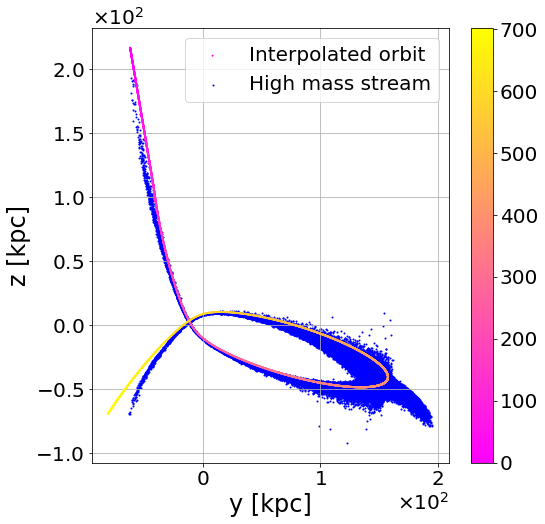

In [16]:
fig_orb2, ax_orb2 = plt.subplots(figsize=(8, 8))

#ax_orb2.plot(interpolated_orbit[:, 1], interpolated_orbit[:, 2], color='r', zorder=10, label='Interpolated orbit')
sc = ax_orb2.scatter(hm_interpolated_orbit[:, 1], hm_interpolated_orbit[:, 2], 
                     c=hm_interpolated_orbit[:, -1], cmap='spring', zorder=10, s=1, 
                     label='Interpolated orbit')
plt.colorbar(sc)

ax_orb2.scatter(high_mass_mod_data[:, 2], high_mass_mod_data[:, 3], c='b', zorder=0, s=1, 
               label='High mass stream')

ax_orb2.set_xlabel('y [kpc]')
ax_orb2.set_ylabel('z [kpc]')
ax_orb2.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax_orb2.xaxis.get_major_formatter().set_powerlimits((0, 0))
ax_orb2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax_orb2.yaxis.get_major_formatter().set_powerlimits((0, 0))

ax_orb2.legend()


plt.show()

# Fiducial model run: 112558 particles, 5Gyr forward

Leo T-like progenitor in Boo III's orbit. Using data without uncertainties:

- $M_{dyn} = 9 \,$M$_{\odot}$
- $r_h = 153 \,$pc
- Maschberger 2012 IMF with masses above $100 \,$M$_{\odot}$

%%time
fid_small_mod_data, fid_small_mod_header, fid_small_mod_extra, fid_small_mod_hist_data = extract_data(r'fiducial_run_data', 
                                                                                          r'Fiducial_run', 39, 1)

print(fid_small_mod_data.shape)
print(fid_small_mod_extra.shape)
print(fid_small_mod_header.shape)
print(fid_small_mod_header[:, -1])

fid_small_mod_halfmass_r = fid_small_mod_extra[0, :]
print(fid_small_mod_halfmass_r)

print(np.max(fid_small_mod_halfmass_r))
print(np.min(fid_small_mod_halfmass_r))

v_mean_fid_small_mod, r_mean_fid_small_mod = means_calc(fid_small_mod_header)

print(v_mean_fid_small_mod.shape)
print(r_mean_fid_small_mod.shape)

### Plotting mean velocities

In [21]:
#means_plots(which='vel', header_array=run_fid_mod_header, mean=v_mean_fid_mod, t_max=5000, run='Fiducial_model', 
#            fig_width=14, fig_height=10, save=False)

In [22]:
#means_plots(which='pos', header_array=run_fid_mod_header, mean=r_mean_fid_mod, t_max=5000, run='Fiducial_model', 
#            fig_width=14, fig_height=10, save=False)

In [23]:
#snapshots_btest = [0, 18, 37, -1]
#snapshots_plot(run_fid_mod_data, snapshots_btest, 25.0e4, 25.0e4, (11, 20), 1, 'Fiducial_model', save=False)

### Animations

In [24]:
#anim_disc(run_fid_mod_data, run_fid_mod_header, tstep=8, nsteps=125, lims=5.0e1, fsize=(10, 10), 
#          tx=-25000, ty=24000, format_type='gif', fps=2, run='btest2')

In [25]:
#anim_3d(run_fid_mod_data, run_fid_mod_header, tstep=128, nsteps=40, lims=25.0e1, fsize=(10, 10), 
#        marker_size=1, tx=-0.5e2, ty=1.0e2, tz=1.0e2, format_type='mp4', fps=6, run='Fiducial_model2')

## Comparing to trace-back of orbit

In [26]:
#anim_ComparetoTraceback(run_fid_mod_data, run_petar_btest_data, lims=2.5e2, 
#                        run_file='Fiducial_run_and_trace_back', run_title='Fiducial run compared to trace back',
#                        fsize=(10, 10), fps=2, format_type='mp4')

In [27]:
#trace_back_snapshots = np.linspace(0, 112, 8, dtype=int)
#print(trace_back_snapshots)
#print(trace_back_snapshots[::-1][6])

#f_anim_3d = np.arange(0, 8, 1)
#print(f_anim_3d)

In [28]:
#run = 'Fiducial_run_and_trace_back'

#len_data = len(data_input)
    
#pos_in = np.round(data_header[2:5, 0], 3)
#vel_in = np.round(data_header[5:, 0], 3)


#fig_anim_3d = plt.figure(figsize=(10, 10)) 
#ax_anim_3d = fig_anim_3d.add_subplot(projection='3d')

#scatter1 = ax_anim_3d.scatter([], [], [], c='b', s=1)
#scatter2 = ax_anim_3d.scatter([], [], [], c='r', s=5)

#scatters = [scatter1, scatter2]

#my_text = ax_anim_3d.text(-1.0e5, 2.0e5, 2.0e5, '', fontsize=20)


#u = np.linspace(0, 2 * np.pi, 100)
#v = np.linspace(0, np.pi, 100)

#x_bulge = 1500 * np.outer(np.cos(u), np.sin(v))
#y_bulge = 1500 * np.outer(np.sin(u), np.sin(v))
#z_bulge = 1500 * np.outer(np.ones(np.size(u)), np.cos(v))

#x_disc = 14490 * np.outer(np.cos(u), np.sin(v))
#y_disc = 14490 * np.outer(np.sin(u), np.sin(v))
#z_disc = 300 * np.outer(np.ones(np.size(u)), np.cos(v))


#min_lim = -2.5e5
#max_lim = 2.5e5

#def init_anim_3d(): 
#    ax_anim_3d.set_title('Fiducial compared to trace-back', fontsize=20, y=0.85)
#    ax_anim_3d.set_xlabel('x [pc]')
#    ax_anim_3d.set_ylabel('y [pc]')
#    ax_anim_3d.set_zlabel('z [pc]') 
    
#    ax_anim_3d.set_xlim(xmin=min_lim, xmax=max_lim)
#    ax_anim_3d.set_ylim(ymin=min_lim, ymax=max_lim)
#    ax_anim_3d.set_zlim(zmin=min_lim, zmax=max_lim)
    
#    # Fixing the ticklabels
#    ax_anim_3d.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
#    ax_anim_3d.xaxis.get_major_formatter().set_powerlimits((0, 0))
#    ax_anim_3d.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
#    ax_anim_3d.yaxis.get_major_formatter().set_powerlimits((0, 0))
#    ax_anim_3d.zaxis.set_major_formatter(ScalarFormatter(useMathText=True))
#    ax_anim_3d.zaxis.get_major_formatter().set_powerlimits((0, 0))
    
#    # Plots Milky Way
#    ax_anim_3d.plot_surface(x_bulge, y_bulge, z_bulge, color='grey', alpha=0.5)
#    ax_anim_3d.plot_surface(x_disc, y_disc, z_disc, color='grey', alpha=0.5)
    
#    ax_anim_3d.view_init(4, 45)
    
#    plt.tight_layout()
#    plt.show()
    
#    return scatters[0], scatters[1],

#def update_anim_3d(frame):
#    my_text.set_text(f't={frame*128} Myr')
    
#    scatters[0]._offsets3d = (run_fid_mod_data[:, 1, frame], run_fid_mod_data[:, 2, frame], 
#                               run_fid_mod_data[:, 3, frame])
    
#    frame2 = trace_back_snapshots[::-1][frame]
#    scatters[1]._offsets3d = (run_petar_btest_data[:, 1, frame2], run_petar_btest_data[:, 2, frame2], 
#                               run_petar_btest_data[:, 3, frame2])
    
#    return scatters[0], scatters[1],



#animation_plots_3d = animation.FuncAnimation(fig_anim_3d, update_anim_3d, 
#                                                frames=f_anim_3d, init_func=init_anim_3d)

    
#writervideo = animation.FFMpegWriter(fps=2)
#animation_plots_3d.save(f'./Animations/Anim_{run}_3d.mp4', writer=writervideo)
        
#writervideo = animation.PillowWriter(fps=fps) 
#animation_plots_3d.save(f'./Animations/Anim_{run}_3d.gif', writer=writervideo)

# Fiducial model run, large: 997967particles, 5Gyr forward

Leo T-like progenitor in Boo III's orbit. Using data without uncertainties:

- $M_{dyn} = 9 \,$M$_{\odot}$
- $r_h = 153 \,$pc
- Maschberger 2012 IMF with masses above $2.955 \,$M$_{\odot}$

In [17]:
%%time
#fid_mod_data, fid_mod_header, fid_mod_extra, fid_mod_hist_data = extract_data(r'fiducial_large_run_restart', 
#                                                                                          r'Fiducial_large_run', 39, 1)

fid_mod_data, fid_mod_header, fid_mod_extra = extract_data_short(r'fiducial_large_run_restart', 
                                                                 r'Fiducial_large_run', 39)

in_fid_mod_data, in_fid_mod_header, in_fid_mod_extra = extract_data_short(r'fiducial_large_run_restart', 
                                                                 r'Fiducial_large_run', 0)

print(fid_mod_data.shape)
print(fid_mod_extra.shape)
print(fid_mod_header.shape)
print(fid_mod_header[:, -1])

fid_mod_halfmass_r = fid_mod_extra[0, :]
print(fid_mod_halfmass_r)

print(np.max(fid_mod_halfmass_r))
print(np.min(fid_mod_halfmass_r))

v_mean_fid_mod, r_mean_fid_mod = means_calc(fid_mod_header)

print(v_mean_fid_mod.shape)
print(r_mean_fid_mod.shape)

(997967, 21, 1)
(4, 1)
(8, 1)
[ 9.97967000e+05  4.99200000e+03  3.64234249e+01  1.54196121e+02
 -4.55313932e+01  6.32416793e+00  2.68520305e+01  1.52638686e+01]
[0.17223316]
0.17223316358935278
0.17223316358935278
(1,)
(1,)
CPU times: user 34.2 s, sys: 1.41 s, total: 35.6 s
Wall time: 35.6 s


### Reducing mean orbit

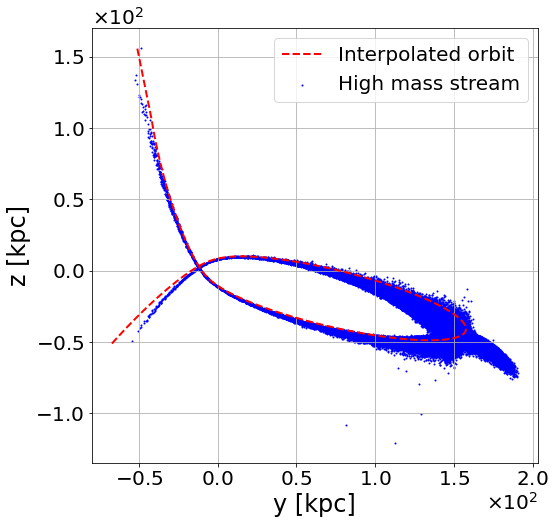

In [18]:
figf1, axf1 = plt.subplots(figsize=(8, 8))

fid_low_tstep = 575
fid_high_tstep = -150

axf1.plot(hm_interpolated_orbit[fid_low_tstep:fid_high_tstep, 1], 
             hm_interpolated_orbit[fid_low_tstep:fid_high_tstep, 2], 
             color='r', zorder=10, label='Interpolated orbit', lw=2, linestyle='dashed')

axf1.scatter(fid_mod_data[:, 2], fid_mod_data[:, 3], c='b', zorder=0, s=1, 
               label='Fiducial model stream')

axf1.set_xlabel('y [kpc]')
axf1.set_ylabel('z [kpc]')
axf1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axf1.xaxis.get_major_formatter().set_powerlimits((0, 0))
axf1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axf1.yaxis.get_major_formatter().set_powerlimits((0, 0))

axf1.legend()


plt.show()

### Plotting mean velocities

In [30]:
#means_plots(which='vel', header_array=run_fid_large_mod_header, mean=v_mean_fid_large_mod, t_max=5000, run='Fiducial_large_model', 
#            fig_width=14, fig_height=10, save=False)

In [31]:
#means_plots(which='pos', header_array=run_fid_large_mod_header, mean=r_mean_fid_large_mod, t_max=5000, run='Fiducial_large_model', 
#            fig_width=14, fig_height=10, save=False)

snapshots_btest = [0, 14, 27, -1]
snapshots_plot(fid_mod_data, snapshots_btest, 25.0e1, 25.0e1, (11, 20), 1, 'Fiducial_model', 
               save=False)

### Animations

In [33]:
#anim_disc(fid_mod_data, fid_mod_header, tstep=8, nsteps=125, lims=5.0e1, fsize=(10, 10), 
#          tx=-25000, ty=24000, format_type='gif', fps=2, run='Fiducial_run_disc')

In [34]:
#anim_3d(fid_mod_data, id_mod_header, tstep=128, 
#        nsteps=39+1, lims=25.0e1, fsize=(10, 10), 
#        marker_size=1, tx=-1.5e2, ty=2.0e2, tz=2.0e2, 
#        format_type='mp4', fps=6, run='Fiducial_model')

## Comparing to trace-back of orbit

In [35]:
#anim_ComparetoTraceback(fid_mod_data, trace_back_data, lims=2.5e2, 
#                        run_file='Fiducial_run_and_trace_back', run_title='Fiducial run compared to trace back',
#                        fsize=(10, 10), fps=2, format_type='mp4')

## Streatching out stream

In [17]:
# Has columns x, y, z, vx, vy, vz
#fid_stream_data = fid_mod_data[:, 1:7, -1]
#fid_orbital_data = np.delete(hm_interpolated_orbit[fid_low_tstep:fid_high_tstep, :], 6, axis=1) # Removing time from orbital data as it is not needed

figsm, axsm = plt.subplots(figsize=(10, 10))

axsm.scatter(fid_stream_data[:, 1], fid_stream_data[:, 2], label='1st bump', 
             s=5, c='b', alpha=0.5)

axsm.plot(orbital_data[:, 1], orbital_data[:, 2], color='r', linestyle='dashed', lw=2)

axsm.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axsm.xaxis.get_major_formatter().set_powerlimits((0, 0))
axsm.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axsm.yaxis.get_major_formatter().set_powerlimits((0, 0))


axsm.set_xlabel('y [kpc]')
axsm.set_ylabel('z [kpc]')
axsm.set_title('Fiducial model and mean orbit')

plt.savefig('./Plots/Fiducial_model_and_mean_orbit_comparison.png', facecolor='w')
plt.show()

In [18]:
#fid_aligned1 = stream_alignment_step1(fid_orbital_data, fid_stream_data)
#print('Done st1')
#fid_aligned2 = stream_alignment_step2(fid_orbital_data, fid_aligned1)
#print('Done st2')

Differences calculated
Done st1


/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Done st2


In [19]:
# Saving aligned data
#np.savetxt('Fid_aligned_data.txt', fid_aligned2, delimiter=',')

In [20]:
# Reading in the aligned data from file
fid_aligned_data = np.loadtxt('Fid_aligned_data.txt', delimiter=',')
fid_orbital_data = np.delete(hm_interpolated_orbit[fid_low_tstep:fid_high_tstep, :], 6, axis=1)

In [21]:
print(np.shape(fid_aligned_data))

(997967, 9)


In [24]:
#fid_variance = np.sum(fid_aligned1[:, -2])/len(fid_aligned1)
#print('DONE')
#print(fid_variance) #=1.653066714653995

DONE
1.653066714653995


figf1, axf1 = plt.subplots(1, 2, figsize=(15, 5))

axf1[0].scatter(fid_aligned1[:, -1], fid_aligned1[:, -2], c='b', s=10)

axf1[0].set_title('Aligned with mean orbit')
axf1[0].set_xlabel(r'$D_{in}$ [kpc]')
axf1[0].set_ylabel(r'$D_{mean}$ [kpc]')

axf1[0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axf1[0].xaxis.get_major_formatter().set_powerlimits((0, 0))
axf1[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axf1[0].yaxis.get_major_formatter().set_powerlimits((0, 0))


axf1[1].scatter(fid_aligned2[:, -2], fid_aligned2[:, -1], c='b', s=10)

axf1[1].set_title('Centred alignment')
axf1[1].set_xlabel(r'$D_{in}$ [kpc]')
axf1[1].set_ylabel(r'$D_{mean}$ [kpc]')

axf1[1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axf1[1].xaxis.get_major_formatter().set_powerlimits((0, 0))
axf1[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axf1[1].yaxis.get_major_formatter().set_powerlimits((0, 0))

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.savefig('./Plots/Stream_alignment_example.png', facecolor='w', bbox_inches='tight')
plt.show()

In [25]:
fid_length, fid_width, fid_part_dens = stream_shape(fid_orbital_data, fid_aligned_data)#fid_aligned2)

In [40]:
#print(fid_stream_data[:10, 0])
#print(fid_aligned2[:10, 0])

# Varying half-mass radius

## $r_h = 169 \,$pc

In [26]:
%%time
#long_rad_mod_data, long_rad_mod_header, long_rad_mod_extra, long_rad_mod_hist_data = extract_data(r'long_radius_run_data', 
#                                                                                                                  r'Longer_radius_run', 39, 1)

long_rad_mod_data, long_rad_mod_header, long_rad_mod_extra = extract_data_short(r'long_radius_run_data', 
                                                                                r'Longer_radius_run', 39)

in_long_rad_mod_data, in_long_rad_mod_header, in_long_rad_mod_extra = extract_data_short(r'long_radius_run_data', 
                                                                                r'Longer_radius_run', 0)

print(long_rad_mod_data.shape)
print(long_rad_mod_extra.shape)
print(long_rad_mod_header.shape)
print(long_rad_mod_header[:, -1])

long_rad_mod_halfmass_r = long_rad_mod_extra[0, :]
print(long_rad_mod_halfmass_r)

print(np.max(long_rad_mod_halfmass_r))
print(np.min(long_rad_mod_halfmass_r))

v_mean_long_rad_mod, r_mean_long_rad_mod = means_calc(long_rad_mod_header)

print(v_mean_long_rad_mod.shape)
print(r_mean_long_rad_mod.shape)

Number of particles is conserved: True
(1000533, 21, 40)
(4, 40)
(8, 40)
[ 1.00053300e+06  4.99200000e+03  3.64209661e+01  1.54190715e+02
 -4.55238761e+01  6.30582240e+00  2.67887267e+01  1.52405019e+01]
[0.169      0.16881856 0.16907346 0.16892613 0.16915764 0.16863088
 0.16840973 0.17155981 0.18254941 0.18286319 0.18268747 0.18308307
 0.18319419 0.18268545 0.18292534 0.18253086 0.1826969  0.18292205
 0.18288146 0.18284111 0.18279883 0.18272474 0.18258043 0.18277588
 0.18268331 0.18268213 0.18268542 0.18259469 0.18307923 0.18120179
 0.20324449 0.19948777 0.19893272 0.19884509 0.19901486 0.19895888
 0.19942967 0.20062486 0.20090593 0.2006727 ]
0.2032444906812349
0.16840972696581966
(40,)
(40,)
CPU times: user 11min 19s, sys: 26.8 s, total: 11min 46s
Wall time: 11min 43s


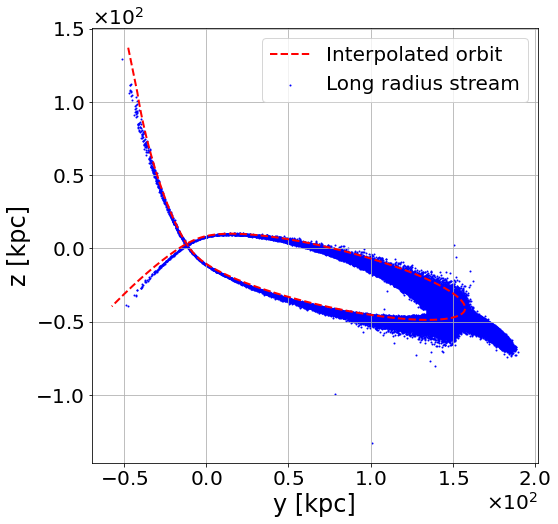

In [27]:
figlr1, axlr1 = plt.subplots(figsize=(8, 8))

lr_low_tstep = 750
lr_high_tstep = -230

axlr1.plot(hm_interpolated_orbit[lr_low_tstep:lr_high_tstep, 1], 
             hm_interpolated_orbit[lr_low_tstep:lr_high_tstep, 2], 
             color='r', zorder=10, lw=2, linestyle='dashed', label='Interpolated orbit')

axlr1.scatter(long_rad_mod_data[:, 2], long_rad_mod_data[:, 3], c='b', zorder=0, s=1, 
               label='Long radius stream')

axlr1.set_xlabel('y [kpc]')
axlr1.set_ylabel('z [kpc]')
axlr1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axlr1.xaxis.get_major_formatter().set_powerlimits((0, 0))
axlr1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axlr1.yaxis.get_major_formatter().set_powerlimits((0, 0))

axlr1.legend()


plt.show()

snapshots = [0, 14, 27, -1]
snapshots_plot(long_rad_mod_data, snapshots, 25.0e1, 25.0e1, (11, 20), 1, 'Long_radius_model', 
               save=False)

In [43]:
#anim_3d(long_rad_mod_data, long_rad_mod_header, tstep=128, 
#        nsteps=39+1, lims=25.0e1, fsize=(10, 10), 
#        marker_size=1, tx=-1.5e2, ty=2.0e2, tz=2.0e2, 
#        format_type='mp4', fps=6, run='Long_radius_model')

In [44]:
#anim_ComparetoTraceback(long_rad_mod_data, trace_back_data, lims=2.5e2, 
#                        run_file='Long_radius_run_and_trace_back', run_title='Long radius run compared to trace back',
#                        fsize=(10, 10), fps=2, format_type='mp4')

In [ ]:
#stream_data_lr = long_rad_mod_data[:, 1:7, -1]
#lr_orbital_data = np.delete(hm_interpolated_orbit[lr_low_tstep:lr_high_tstep, :], 6, axis=1)

In [28]:
#lr_aligned1 = stream_alignment_step1(lr_orbital_data, stream_data_lr)
#print('St1 Done')
#lr_aligned2 = stream_alignment_step2(lr_orbital_data, lr_aligned1)
#print('St2 Done')

Differences calculated
St1 Done


/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


St2 Done


In [29]:
# Saving aligned data
#np.savetxt('Lr_aligned_data.txt', lr_aligned2, delimiter=',')

In [30]:
# Reading in the aligned data from file
lr_aligned_data = np.loadtxt('Lr_aligned_data.txt', delimiter=',')
lr_orbital_data = np.delete(hm_interpolated_orbit[lr_low_tstep:lr_high_tstep, :], 6, axis=1)

In [31]:
#print(np.shape(lr_aligned_data))

(1000533, 9)


In [32]:
lr_length, lr_width, lr_part_dens = stream_shape(lr_orbital_data, lr_aligned_data)
print('DONE')

DONE


In [33]:
#lr_variance = np.sum(lr_aligned1[:, -2])/len(lr_aligned1)

#print(lr_variance) #1.9802923926766476

1.9802923926766476


## $r_h = 137 \,$pc

In [34]:
%%time
#short_rad_mod_data, short_rad_mod_header, short_rad_mod_extra, short_rad_mod_hist_data = extract_data(r'short_radius_run_data', 
#                                                                                                                  r'Shorter_radius_run', 39, 1)

short_rad_mod_data, short_rad_mod_header, short_rad_mod_extra = extract_data_short(r'short_radius_run_data', 
                                                                                   r'Shorter_radius_run', 39)

in_short_rad_mod_data, in_short_rad_mod_header, in_short_rad_mod_extra = extract_data_short(r'short_radius_run_data', 
                                                                                   r'Shorter_radius_run', 0)


print(short_rad_mod_data.shape)
print(short_rad_mod_extra.shape)
print(short_rad_mod_header.shape)
print(short_rad_mod_header[:, -1])

short_rad_mod_halfmass_r = short_rad_mod_extra[0, :]
print(short_rad_mod_halfmass_r)

print(np.max(short_rad_mod_halfmass_r))
print(np.min(short_rad_mod_halfmass_r))

v_mean_short_rad_mod, r_mean_short_rad_mod = means_calc(short_rad_mod_header)

print(v_mean_short_rad_mod.shape)
print(r_mean_short_rad_mod.shape)

Number of particles is conserved: True
(1002148, 21, 40)
(4, 40)
(8, 40)
[ 1.00214800e+06  4.99200000e+03  3.64196647e+01  1.54208955e+02
 -4.55264088e+01  6.32214161e+00  2.68197512e+01  1.52673799e+01]
[0.137      0.13720959 0.13710806 0.13694002 0.13724839 0.1368118
 0.1368667  0.13997547 0.14225931 0.14244258 0.1423762  0.14220089
 0.14237255 0.14197493 0.14231756 0.1422445  0.14202831 0.14207533
 0.14214844 0.14251183 0.14236977 0.14213855 0.14227252 0.14221791
 0.14232703 0.14250612 0.14223919 0.14256253 0.14225014 0.14190846
 0.1473178  0.14743233 0.14711443 0.14712224 0.14726445 0.1474863
 0.14758518 0.14719936 0.14774667 0.14762151]
0.14774667400723443
0.13681179893056963
(40,)
(40,)
CPU times: user 11min 21s, sys: 23.1 s, total: 11min 44s
Wall time: 11min 46s


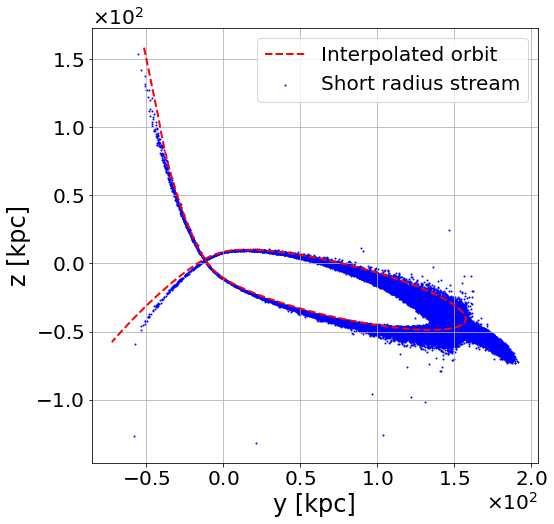

In [35]:
figsr1, axsr1 = plt.subplots(figsize=(8, 8))

sr_low_tstep = 550
sr_high_tstep = -100

axsr1.plot(hm_interpolated_orbit[sr_low_tstep:sr_high_tstep, 1], 
             hm_interpolated_orbit[sr_low_tstep:sr_high_tstep, 2], 
             color='r', zorder=10, lw=2, linestyle='dashed', label='Interpolated orbit')

axsr1.scatter(short_rad_mod_data[:, 2], short_rad_mod_data[:, 3], c='b', zorder=0, s=1, 
               label='Short radius stream')

axsr1.set_xlabel('y [kpc]')
axsr1.set_ylabel('z [kpc]')
axsr1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axsr1.xaxis.get_major_formatter().set_powerlimits((0, 0))
axsr1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axsr1.yaxis.get_major_formatter().set_powerlimits((0, 0))

axsr1.legend()


plt.show()

snapshots = [0, 14, 27, -1]
snapshots_plot(short_rad_mod_data, snapshots, 25.0e1, 25.0e1, (11, 20), 1, 'Short_radius_model', 
               save=False)

In [ ]:
#%%time
#anim_3d(short_rad_mod_data, short_rad_mod_header, tstep=128, 
#        nsteps=39+1, lims=25.0e1, fsize=(10, 10), 
#        marker_size=1, tx=-1.5e2, ty=2.0e2, tz=2.0e2, 
#        format_type='mp4', fps=6, run='Short_radius_model')

In [ ]:
#anim_ComparetoTraceback(short_rad_mod_data, trace_back_data, lims=2.5e2, 
#                        run_file='Short_radius_run_and_trace_back', run_title='Short radius run compared to trace back',
#                        fsize=(10, 10), fps=2, format_type='mp4')

In [36]:
#stream_data_sr = short_rad_mod_data[:, 1:7, -1]
#sr_orbital_data = np.delete(hm_interpolated_orbit[sr_low_tstep:sr_high_tstep, :], 6, axis=1)

#sr_aligned1 = stream_alignment_step1(sr_orbital_data, stream_data_sr)
#print('St1 DONE')
#sr_aligned2 = stream_alignment_step2(sr_orbital_data, sr_aligned1)
#print('St2 DONE')

Differences calculated
St1 DONE


/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


St2 DONE


In [37]:
# Saving aligned data
#np.savetxt('Sr_aligned_data.txt', sr_aligned2, delimiter=',')

In [38]:
# Reading in the aligned data from file
sr_aligned_data = np.loadtxt('Sr_aligned_data.txt', delimiter=',')
sr_orbital_data = np.delete(hm_interpolated_orbit[sr_low_tstep:sr_high_tstep, :], 6, axis=1)

In [39]:
print(np.shape(sr_aligned_data))

(1002148, 9)


In [40]:
sr_length, sr_width, sr_part_dens = stream_shape(sr_orbital_data, sr_aligned_data)
print('Done')

Done


In [41]:
#sr_variance = np.sum(sr_aligned1[:, -2])/len(sr_aligned1)

#print(sr_variance) #1.3551041314660475

1.3551041314660475


In [42]:
#tot_mass = np.sum(short_rad_mod_data[:, 0, -1])

#print(tot_mass)

# Varying dynamical mass

## $M_{dyn} = 13 \,$M$_{\odot}$

**This is done in the beginning instead!!!**

In [ ]:
%%time
high_mass_mod_data, high_mass_mod_header, high_mass_mod_extra, high_mass_mod_hist_data = extract_data(r'high_mass_run_data', 
                                                                                                                  r'High_mass_run', 39, 1)

print(high_mass_mod_data.shape)
print(high_mass_mod_extra.shape)
print(high_mass_mod_header.shape)
print(high_mass_mod_header[:, -1])

high_mass_mod_halfmass_r = high_mass_mod_extra[0, :]
print(high_mass_mod_halfmass_r)

print(np.max(high_mass_mod_halfmass_r))
print(np.min(high_mass_mod_halfmass_r))

v_mean_high_mass_mod, r_mean_high_mass_mod = means_calc(high_mass_mod_header)

print(v_mean_high_mass_mod.shape)
print(r_mean_high_mass_mod.shape)

snapshots = [0, 14, 27, -1]
snapshots_plot(high_mass_mod_data, snapshots, 25.0e1, 25.0e1, (11, 20), 1, 'High_mass_model', 
               save=False)

In [ ]:
#%%time
#anim_3d(high_mass_mod_data, high_mass_mod_header, tstep=128, 
#        nsteps=39+1, lims=25.0e1, fsize=(10, 10), 
#        marker_size=1, tx=-1.5e2, ty=2.0e2, tz=2.0e2, 
#        format_type='mp4', fps=6, run='High_mass_model')

In [ ]:
#anim_ComparetoTraceback(high_mass_mod_data, trace_back_data, lims=2.5e2, 
#                        run_file='High_mass_run_and_trace_back', run_title='High mass run compared to trace back',
#                        fsize=(10, 10), fps=2, format_type='mp4')

In [19]:
stream_data_hm = high_mass_mod_data[:, 1:7]
hm_orbital_data = np.delete(hm_interpolated_orbit, 6, axis=1)

hm_aligned1 = stream_alignment_step1(hm_orbital_data, stream_data_hm)
print('St1 DONE')
hm_aligned2 = stream_alignment_step2(hm_orbital_data, hm_aligned1)
print('St2 DONE')

ValueError: operands could not be broadcast together with shapes (1000066,1,3,1) (4945,3) 

In [29]:
# Saving aligned data
np.savetxt('Hm_aligned_data.txt', hm_aligned2, delimiter=',')

In [30]:
# Reading in the aligned data from file
hm_aligned_data = np.loadtxt('Hm_aligned_data.txt', delimiter=',')
#hm_orbital_data = np.delete(hm_interpolated_orbit, 6, axis=1)

In [31]:
print(np.shape(hm_aligned_data))

(1000533, 9)


In [ ]:
hm_length, hm_width, hm_part_dens = stream_shape(hm_orbital_data, hm_aligned_data)
print('DONE')

In [ ]:
hm_variance = np.sum(hm_aligned1[:, -2])/len(hm_aligned1)

print(hm_variance)

In [ ]:
tot_mass = np.sum(high_mass_mod_data[:, 0, -1])

print(tot_mass)

upper_part_mask = np.where(high_mass_mod_data[:, 3, -1] == np.max(high_mass_mod_data[:, 3, -1]))
upper_part_pos = high_mass_mod_data[upper_part_mask, 1:4, -1]
print(np.shape(upper_part_pos))
upper_orb_part = orbital_data[0, :3]

diff = upper_part_pos - upper_orb_part
dist = np.sqrt(np.sum(diff**2))
print(dist)

hm_length = hm_length + dist

fighmt = plt.figure(figsize=(10, 8))
axhmt = fighmt.add_subplot(projection='3d', computed_zorder=False)

axhmt.scatter(high_mass_mod_data[:, 1, -1], high_mass_mod_data[:, 2, -1], high_mass_mod_data[:, 3, -1], 
              s=5, c='b', alpha=0.5, zorder=0)
axhmt.scatter(upper_part_pos[:, :, 0], upper_part_pos[:, :, 1], upper_part_pos[:, :, 2], 
              s=10, c='r', zorder=20)

axhmt.plot(orbital_data[:, 0], orbital_data[:, 1], orbital_data[:, 2], 
              color='k', zorder=5)
axhmt.scatter(orbital_data[0, 0], orbital_data[0, 1], orbital_data[0, 2], 
              c='g', zorder=20)
#sc = axhmt.scatter(fid_core_part[:, 0], fid_core_part[:, 1], fid_core_part[:, 2], s=10, c=fid_core_part[:, 1], 
#             alpha=0.5, cmap='spring')

#plt.colorbar(sc, label='y [pc]')
axhmt.set_xlabel('x [kpc]', labelpad=15)
axhmt.set_ylabel('y [kpc]', labelpad=15)
axhmt.set_zlabel('z [kpc]', labelpad=5)
axhmt.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axhmt.xaxis.get_major_formatter().set_powerlimits((0, 0))
axhmt.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axhmt.yaxis.get_major_formatter().set_powerlimits((0, 0))
axhmt.zaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axhmt.zaxis.get_major_formatter().set_powerlimits((0, 0))

axhmt.view_init(4, 45)


plt.show()

## $M_{dyn} = 6 \,$M$_{\odot}$

In [ ]:
%%time
low_mass_mod_data, low_mass_mod_header, low_mass_mod_extra, low_mass_mod_hist_data = extract_data(r'low_mass_run_data', 
                                                                                                                  r'Low_mass_run', 39, 1)

print(low_mass_mod_data.shape)
print(low_mass_mod_extra.shape)
print(low_mass_mod_header.shape)
print(low_mass_mod_header[:, -1])

low_mass_mod_halfmass_r = low_mass_mod_extra[0, :]
print(low_mass_mod_halfmass_r)

print(np.max(low_mass_mod_halfmass_r))
print(np.min(low_mass_mod_halfmass_r))

v_mean_low_mass_mod, r_mean_low_mass_mod = means_calc(low_mass_mod_header)

print(v_mean_low_mass_mod.shape)
print(r_mean_low_mass_mod.shape)

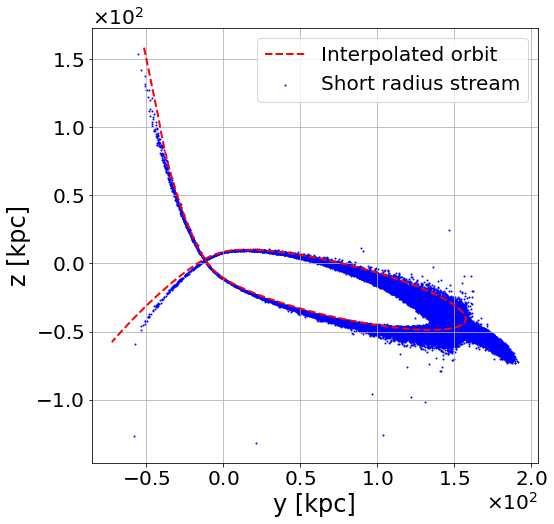

In [44]:
figlm1, axlm1 = plt.subplots(figsize=(8, 8))

lm_low_tstep = 550
lm_high_tstep = -100

axlm1.plot(hm_interpolated_orbit[lm_low_tstep:lm_high_tstep, 1], 
             hm_interpolated_orbit[lm_low_tstep:lm_high_tstep, 2], 
             color='r', zorder=10, lw=2, linestyle='dashed', label='Interpolated orbit')

axlm1.scatter(low_mass_mod_data[:, 2, -1], low_mass_mod_data[:, 3, -1], c='b', zorder=0, s=1, 
               label='Low mass stream')

axlm1.set_xlabel('y [kpc]')
axlm1.set_ylabel('z [kpc]')
axlm1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axlm1.xaxis.get_major_formatter().set_powerlimits((0, 0))
axlm1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axlm1.yaxis.get_major_formatter().set_powerlimits((0, 0))

axlm1.legend()


plt.show()

snapshots = [0, 14, 27, -1]
snapshots_plot(low_mass_mod_data, snapshots, 25.0e1, 25.0e1, (11, 20), 1, 'Low_mass_model', 
               save=False)

In [ ]:
#%%time
#anim_3d(low_mass_mod_data, low_mass_mod_header, tstep=128, 
#        nsteps=39+1, lims=25.0e1, fsize=(10, 10), 
#        marker_size=1, tx=-1.5e2, ty=2.0e2, tz=2.0e2, 
#        format_type='mp4', fps=6, run='Low_mass_model')

In [ ]:
#anim_ComparetoTraceback(low_mass_mod_data, trace_back_data, lims=2.5e2, 
#                        run_file='Low_mass_run_and_trace_back', run_title='Low mass run compared to trace back',
#                        fsize=(10, 10), fps=2, format_type='mp4')

In [ ]:
stream_data_lm = low_mass_mod_data[:, 1:7, -1]
lm_orbital_data = np.delete(hm_interpolated_orbit[lm_low_tstep:lm_high:tstep, :], 6, axis=1)

lm_aligned1 = stream_alignment_step1(orbital_data, stream_data_lm)
print('St1 DONE')
lm_aligned2 = stream_alignment_step2(orbital_data, lm_aligned1)
print('St2 DONE')

In [29]:
# Saving aligned data
np.savetxt('Lm_aligned_data.txt', lm_aligned2, delimiter=',')

In [30]:
# Reading in the aligned data from file
lm_aligned_data = np.loadtxt('Lm_aligned_data.txt', delimiter=',')

In [31]:
print(np.shape(lm_aligned_data))

(1000533, 9)


In [ ]:
lm_length, lm_width, lm_part_dens = stream_shape(orbital_data, lm_aligned_data)
print('DONE')

In [ ]:
lm_variance = np.sum(lm_aligned1[:, -2])/len(lm_aligned1)

print(lm_variance)

In [ ]:
tot_mass2 = np.sum(low_mass_mod_data[:, 0, -1])

print(tot_mass)

## Comparing the 5 different simulations

from matplotlib import gridspec as gs

fig9 = plt.figure(figsize=(14, 12))

models = [run_fid_large_mod_data, run_long_rad_mod_data, run_short_rad_mod_data, run_high_mass_mod_data, run_low_mass_mod_data]
titles = ['Fiducial run', 'Long radius run', 'Short radius run', 'High mass run', 'Low mass run']

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

min_lim = -1.5e5
max_lim = 1.5e5


x_bulge = 1500 * np.outer(np.cos(u), np.sin(v))
y_bulge = 1500 * np.outer(np.sin(u), np.sin(v))
z_bulge = 1500 * np.outer(np.ones(np.size(u)), np.cos(v))

x_disc = 14490 * np.outer(np.cos(u), np.sin(v))
y_disc = 14490 * np.outer(np.sin(u), np.sin(v))
z_disc = 300 * np.outer(np.ones(np.size(u)), np.cos(v))


i=4
    
ax9 = fig9.add_subplot(projection='3d')

ax9.scatter(models[i][:, 1, -1], models[i][:, 2, -1], models[i][:, 3, -1], c='b', s=1, alpha=0.1)

ax9.set_title(titles[i], y=0.8)
ax9.set_xlabel('x [pc]', labelpad=15)
ax9.set_ylabel('y [pc]', labelpad=15)
ax9.set_zlabel('z [pc]', labelpad=5)
    
ax9.set_xlim(xmin=min_lim, xmax=max_lim)
ax9.set_ylim(ymin=min_lim, ymax=max_lim)
ax9.set_zlim(zmin=min_lim, zmax=max_lim)
ax9.plot_surface(x_bulge, y_bulge, z_bulge, color='grey', alpha=0.5)
ax9.plot_surface(x_disc, y_disc, z_disc, color='grey', alpha=0.5)

ax9.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax9.xaxis.get_major_formatter().set_powerlimits((0, 0))
ax9.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax9.yaxis.get_major_formatter().set_powerlimits((0, 0))
ax9.zaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax9.zaxis.get_major_formatter().set_powerlimits((0, 0))
    
ax9.view_init(4, 45)

ax9.dist=12 # Increases figure limits


#plt.tight_layout()
#plt.subplots_adjust(right=1.2)
plt.savefig('./Plots/Low_mass_run_last_snapshot.png', bbox_inches='tight')
plt.show()

## Compare stream shapes

### Variance (I think)

In [ ]:
#print(fid_variance, lr_variance, sr_variance, hm_variance, lm_variance)

### Velocity dispersion

In [ ]:
fid_vel = np.sqrt(np.sum(fid_mod_data[:, 4:7, 0]**2, axis=1))
lr_vel = np.sqrt(np.sum(long_rad_mod_data[:, 4:7, 0]**2, axis=1))
sr_vel = np.sqrt(np.sum(short_rad_mod_data[:, 4:7, 0]**2, axis=1))
hm_vel = np.sqrt(np.sum(high_mass_mod_data[:, 4:7, 0]**2, axis=1))
lm_vel = np.sqrt(np.sum(low_mass_mod_data[:, 4:7, 0]**2, axis=1))

fid_vel_disp = np.std(fid_vel)
lr_vel_disp = np.std(lr_vel)
sr_vel_disp = np.std(sr_vel)
hm_vel_disp = np.std(hm_vel)
lm_vel_disp = np.std(lm_vel)

print(f'Heavy, and longest: {hm_vel_disp:.3}')
print(f'Compact, and 2nd longest: {sr_vel_disp:.3}')
print(f'Fiducial, and median length: {fid_vel_disp:.3}') 
print(f'Diffuse, and 2nd shortest: {lr_vel_disp:.3}') 
print(f'Light, and shortest: {lm_vel_disp:.3}')

print()
print(f'Heavy, and longest: {np.max(hm_vel):.3}')
print(f'Compact, and 2nd longest: {np.max(sr_vel):.3}')
print(f'Fiducial, and median length: {np.max(fid_vel):.3}') 
print(f'Diffuse, and 2nd shortest: {np.max(lr_vel):.3}') 
print(f'Light, and shortest: {np.max(lm_vel):.3}')

### Length

In [ ]:
figc1, axc1 = plt.subplots(figsize=(10, 6))

#plt.minorticks_on()

x_vals = np.array([1, 2, 3, 4, 5])
y_vals = np.array([fid_length, lr_length, sr_length, hm_length, lm_length])

labels = ["Fiducial", "Diffuse", "Compact", "Heavy", "Light"]
#labels = []

axc1.scatter(x_vals, y_vals, s=30, c='b', zorder=10)

axc1.set_title('Stream lengths')
axc1.set_ylabel('Length [kpc]')

axc1.set_xticks(x_vals, labels=labels)
#axc1.set_xticklabels(xticklabels, minor=False)
axc1.set_xticklabels(labels, minor=False)


axc1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axc1.yaxis.get_major_formatter().set_powerlimits((0, 0))

plt.grid(which='major', zorder=-10)


plt.savefig('./Plots/Length_comparisons.png', facecolor='w')
plt.show()

### Width

In [ ]:
print(len(orbital_data))
print(len(fid_width))

In [ ]:
width_high_cut = 4e2
high_cut_mask = orbital_data[:, -1]>=width_high_cut
width_low_cut = 3e2
low_cut_mask = orbital_data[:, -1]<=width_low_cut

fid_leading_width = fid_width[high_cut_mask]
lr_leading_width = lr_width[high_cut_mask]
sr_leading_width = sr_width[high_cut_mask]
hm_leading_width = hm_width[high_cut_mask]
lm_leading_width = lm_width[high_cut_mask]
orbital_leading = orbital_data[high_cut_mask, :]
print(np.shape(orbital_data))
print(np.shape(orbital_leading))
print(np.shape(fid_leading_width))


fid_trailing_width = fid_width[low_cut_mask]
lr_trailing_width = lr_width[low_cut_mask]
sr_trailing_width = sr_width[low_cut_mask]
hm_trailing_width = hm_width[low_cut_mask]
lm_trailing_width = lm_width[low_cut_mask]
orbital_trailing = orbital_data[low_cut_mask, :]

In [ ]:
figc21, axc21 = plt.subplots(1, 2, figsize=(15, 7))

axc21[0].scatter(orbital_trailing[:, -1], fid_trailing_width, c='b', s=10, alpha=0.5, label='Fiducial', zorder=10)
axc21[0].scatter(orbital_trailing[:, -1], lr_trailing_width, c='darkviolet', s=10, alpha=0.5, label='Diffuse', zorder=15)
axc21[0].scatter(orbital_trailing[:, -1], sr_trailing_width, c='deeppink', s=10, alpha=0.5, label='Compact', zorder=5)
axc21[0].scatter(orbital_trailing[:, -1], hm_trailing_width, c='darkgreen', s=10, alpha=0.5, label='Heavy', zorder=0)
axc21[0].scatter(orbital_trailing[:, -1], lm_trailing_width, c='lime', s=10, alpha=0.5, label='Light', zorder=20)


axc21[0].set_title('Width along trailing tail')
axc21[0].set_xlabel('Distance in stream [kpc]')
axc21[0].set_ylabel('Width [kpc]')

axc21[0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axc21[0].xaxis.get_major_formatter().set_powerlimits((0, 0))
axc21[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axc21[0].yaxis.get_major_formatter().set_powerlimits((0, 0))

axc21[0].set_ylim(ymin=0, ymax=0.2e2)


lgnd = axc21[0].legend()
lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]
lgnd.legendHandles[2]._sizes=[30]
lgnd.legendHandles[3]._sizes=[30]
lgnd.legendHandles[4]._sizes=[30]
lgnd.legendHandles[0].set_alpha(1)
lgnd.legendHandles[1].set_alpha(1)
lgnd.legendHandles[2].set_alpha(1)
lgnd.legendHandles[3].set_alpha(1)
lgnd.legendHandles[4].set_alpha(1)






axc21[1].scatter(orbital_leading[:, -1], fid_leading_width, c='b', s=10, alpha=0.5, label='Fiducial', zorder=10)
axc21[1].scatter(orbital_leading[:, -1], lr_leading_width, c='darkviolet', s=10, alpha=0.5, label='Diffuse', zorder=15)
axc21[1].scatter(orbital_leading[:, -1], sr_leading_width, c='deeppink', s=10, alpha=0.5, label='Compact', zorder=5)
axc21[1].scatter(orbital_leading[:, -1], hm_leading_width, c='darkgreen', s=10, alpha=0.5, label='Heavy', zorder=0)
axc21[1].scatter(orbital_leading[:, -1], lm_leading_width, c='lime', s=10, alpha=0.5, label='Light', zorder=20)


axc21[1].set_title('Width along leading tail')
axc21[1].set_xlabel('Distance in stream [kpc]')
axc21[1].set_ylabel('Width [kpc]')

axc21[1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axc21[1].xaxis.get_major_formatter().set_powerlimits((0, 0))
axc21[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axc21[1].yaxis.get_major_formatter().set_powerlimits((0, 0))

axc21[1].set_ylim(ymin=0, ymax=0.2e2)


lgnd = axc21[1].legend()
lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]
lgnd.legendHandles[2]._sizes=[30]
lgnd.legendHandles[3]._sizes=[30]
lgnd.legendHandles[4]._sizes=[30]
lgnd.legendHandles[0].set_alpha(1)
lgnd.legendHandles[1].set_alpha(1)
lgnd.legendHandles[2].set_alpha(1)
lgnd.legendHandles[3].set_alpha(1)
lgnd.legendHandles[4].set_alpha(1)


plt.tight_layout()
#plt.savefig('./Plots/Width_along_stream_comparison.png', facecolor='w')
#plt.savefig('./Plots/Width_along_stream_hmlm_comparison.png', facecolor='w')
#plt.savefig('./Plots/Width_along_stream_fidhmlm_comparison.png', facecolor='w')
#plt.savefig('./Plots/Width_along_stream_fidlrsr_comparison.png', facecolor='w')
plt.show()

In [ ]:
nbins=10
#stream_prop, stream_data, comp_prop, comp_data, orbit_data, n_bins
leading_diff_fid_lr = binned_relative_difference(lr_leading_width, lr_mod_data, fid_leading_width, 
                                                 fid_mod_data, orbital_leading, nbins)
leading_diff_fid_sr = binned_relative_difference(sr_leading_width, sr_mod_data, fid_leading_width, 
                                                 fid_mod_data, orbital_leading, nbins)
leading_diff_fid_hm = binned_relative_difference(hm_leading_width, hm_mod_data, fid_leading_width, 
                                                 fid_mod_data, orbital_leading, nbins)
leading_diff_fid_lm = binned_relative_difference(lm_leading_width, lm_mod_data, fid_leading_width, 
                                                 fid_mod_data, orbital_leading, nbins)

leading_diff_lr_sr = binned_relative_difference(sr_leading_width, sr_mod_data, lr_leading_width, 
                                                lr_mod_data, orbital_leading, nbins)
leading_diff_hm_lm = binned_relative_difference(lm_leading_width, lm_mod_data, hm_leading_width, 
                                                hm_mod_data, orbital_leading, nbins)



trailing_diff_fid_lr = binned_relative_difference(lr_trailing_width, lr_mod_data, fid_trailing_width, 
                                                  fid_mod_data, orbital_trailing, nbins)
trailing_diff_fid_sr = binned_relative_difference(sr_trailing_width, sr_mod_data, fid_trailing_width, 
                                                  fid_mod_data, orbital_trailing, nbins)
trailing_diff_fid_hm = binned_relative_difference(hm_trailing_width, hm_mod_data, fid_trailing_width, 
                                                  fid_mod_data, orbital_trailing, nbins)
trailing_diff_fid_lm = binned_relative_difference(lm_trailing_width, lm_mod_data, fid_trailing_width, 
                                                  fid_mod_data, orbital_trailing, nbins)

trailing_diff_lr_sr = binned_relative_difference(sr_trailing_width, sr_mod_data, lr_trailing_width, 
                                                 lr_mod_data, orbital_trailing, nbins)
trailing_diff_hm_lm = binned_relative_difference(lm_trailing_width, lm_mod_data, hm_trailing_width, 
                                                 hm_mod_data, orbital_trailing, nbins)

In [ ]:
figcw2, axcw2 = plt.subplots(2, 2, figsize=(20, 16))

lims = 10

# Comparinf Fuducial to other models
# ------------------------------------------------------------------------------------
axcw2[0, 0].scatter(trailing_diff_fid_lr[:, 0], trailing_diff_fid_lr[:, 1], c='darkviolet', label='Fiducial-Diffuse', s=10)
axcw2[0, 0].scatter(trailing_diff_fid_sr[:, 0], trailing_diff_fid_sr[:, 1], c='deeppink', label='Fiducial-Compact', s=10)
axcw2[0, 0].scatter(trailing_diff_fid_hm[:, 0], trailing_diff_fid_hm[:, 1], c='darkgreen', label='Fiducial-Heavy', s=10)
axcw2[0, 0].scatter(trailing_diff_fid_lm[:, 0], trailing_diff_fid_lm[:, 1], c='lime', label='Fiducial-Light', s=10)


axcw2[0, 0].errorbar(trailing_diff_fid_lr[:, 0], trailing_diff_fid_lr[:, 1], yerr=trailing_diff_fid_lr[:, 2], ecolor='darkviolet', capsize=1, 
                 linestyle='')
axcw2[0, 0].errorbar(trailing_diff_fid_sr[:, 0], trailing_diff_fid_sr[:, 1], yerr=trailing_diff_fid_sr[:, 2], ecolor='deeppink', capsize=1, 
                 linestyle='')
axcw2[0, 0].errorbar(trailing_diff_fid_hm[:, 0], trailing_diff_fid_hm[:, 1], yerr=trailing_diff_fid_hm[:, 2], ecolor='darkgreen', capsize=1, 
                 linestyle='')
axcw2[0, 0].errorbar(trailing_diff_fid_lm[:, 0], trailing_diff_fid_lm[:, 1], yerr=trailing_diff_fid_lm[:, 2], ecolor='lime', capsize=1, 
                 linestyle='')


axcw2[0, 0].set_ylim(ymin=-lims, ymax=lims)
axcw2[0, 0].set_title('Trailing tail')
axcw2[0, 0].set_ylabel('Relative difference')
axcw2[0, 0].set_xlabel('Distance in stream [kpc]')

axcw2[0, 0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axcw2[0, 0].xaxis.get_major_formatter().set_powerlimits((0, 0))


lgnd = axcw2[0, 0].legend()
lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]
lgnd.legendHandles[2]._sizes=[30]
lgnd.legendHandles[3]._sizes=[30]
lgnd.legendHandles[0].set_alpha(1)
lgnd.legendHandles[1].set_alpha(1)
lgnd.legendHandles[2].set_alpha(1)
lgnd.legendHandles[3].set_alpha(1)


# Leading
axcw2[0, 1].scatter(leading_diff_fid_lr[:, 0], leading_diff_fid_lr[:, 1], c='darkviolet', label='Fiducial-Diffuse', s=10)
axcw2[0, 1].scatter(leading_diff_fid_sr[:, 0], leading_diff_fid_sr[:, 1], c='deeppink', label='Fiducial-Compact', s=10)
axcw2[0, 1].scatter(leading_diff_fid_hm[:, 0], leading_diff_fid_hm[:, 1], c='darkgreen', label='Fiducial-Heavy', s=10)
axcw2[0, 1].scatter(leading_diff_fid_lm[:, 0], leading_diff_fid_lm[:, 1], c='lime', label='Fiducial-Light', s=10)


axcw2[0, 1].errorbar(leading_diff_fid_lr[:, 0], leading_diff_fid_lr[:, 1], yerr=leading_diff_fid_lr[:, 2], ecolor='darkviolet', capsize=1, 
                 linestyle='')
axcw2[0, 1].errorbar(leading_diff_fid_sr[:, 0], leading_diff_fid_sr[:, 1], yerr=leading_diff_fid_sr[:, 2], ecolor='deeppink', capsize=1, 
                 linestyle='')
axcw2[0, 1].errorbar(leading_diff_fid_hm[:, 0], leading_diff_fid_hm[:, 1], yerr=leading_diff_fid_hm[:, 2], ecolor='darkgreen', capsize=1, 
                 linestyle='')
axcw2[0, 1].errorbar(leading_diff_fid_lm[:, 0], leading_diff_fid_lm[:, 1], yerr=leading_diff_fid_lm[:, 2], ecolor='lime', capsize=1, 
                 linestyle='')


axcw2[0, 1].set_ylim(ymin=-lims, ymax=lims)
axcw2[0, 0].set_title('Leading tail')
axcw2[0, 1].set_ylabel('Relative difference')
axcw2[0, 1].set_xlabel('Distance in stream [kpc]')

axcw2[0, 1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axcw2[0, 1].xaxis.get_major_formatter().set_powerlimits((0, 0))


lgnd = axcw2[0, 1].legend()
lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]
lgnd.legendHandles[2]._sizes=[30]
lgnd.legendHandles[3]._sizes=[30]
lgnd.legendHandles[0].set_alpha(1)
lgnd.legendHandles[1].set_alpha(1)
lgnd.legendHandles[2].set_alpha(1)
lgnd.legendHandles[3].set_alpha(1)





axcw2[1, 0].scatter(trailing_diff_lr_sr[:, 0], trailing_diff_lr_sr[:, 1], c='b', label='Diffuse-Compact', s=10)
axcw2[1, 0].scatter(trailing_diff_hm_lm[:, 0], trailing_diff_hm_lm[:, 1], c='r', label='Heavy-Light', s=10)

axcw2[1, 0].errorbar(trailing_diff_lr_sr[:, 0], trailing_diff_lr_sr[:, 1], yerr=trailing_diff_lr_sr[:, 2], ecolor='b', capsize=1, linestyle='')
axcw2[1, 0].errorbar(trailing_diff_hm_lm[:, 0], trailing_diff_hm_lm[:, 1], yerr=trailing_diff_hm_lm[:, 2], ecolor='r', capsize=1, linestyle='')



axcw2[1, 0].set_ylim(ymin=-lims, ymax=lims)
axcw2[1, 0].set_title('Trailing tail')
axcw2[1, 0].set_ylabel('Relative difference')
axcw2[1, 0].set_xlabel('Distance in stream [kpc]')

axcw2[1, 0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axcw2[1, 0].xaxis.get_major_formatter().set_powerlimits((0, 0))


lgnd = axcw2[1, 0].legend()
lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]
lgnd.legendHandles[0].set_alpha(1)
lgnd.legendHandles[1].set_alpha(1)



axcw2[1, 1].scatter(leading_diff_lr_sr[:, 0], leading_diff_lr_sr[:, 1], c='b', label='Diffuse-Compact', s=10)
axcw2[1, 1].scatter(leading_diff_hm_lm[:, 0], leading_diff_hm_lm[:, 1], c='r', label='Heavy-Light', s=10)

axcw2[1, 1].errorbar(leading_diff_lr_sr[:, 0], leading_diff_lr_sr[:, 1], yerr=leading_diff_lr_sr[:, 2], ecolor='b', capsize=1, linestyle='')
axcw2[1, 1].errorbar(leading_diff_hm_lm[:, 0], leading_diff_hm_lm[:, 1], yerr=leading_diff_hm_lm[:, 2], ecolor='r', capsize=1, linestyle='')



axcw2[1, 1].set_ylim(ymin=-lims, ymax=lims)
axcw2[1, 1].set_title('Leading tail')
axcw2[1, 1].set_ylabel('Relative difference')
axcw2[1, 1].set_xlabel('Distance in stream [kpc]')

axcw2[1, 1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axcw2[1, 1].xaxis.get_major_formatter().set_powerlimits((0, 0))


lgnd = axcw2[1, 1].legend()
lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]
lgnd.legendHandles[0].set_alpha(1)
lgnd.legendHandles[1].set_alpha(1)

figcw2.suptitle('Relative difference in stream width', fontsize=28)

figcw2.dist = 12

plt.tight_layout()
#plt.subplots_adjust(hspace=0.3)
#plt.savefig('./Plots/Relative_differences_width.png', facecolor='w', bbox_inches='tight')
plt.show()

figc2, axc2 = plt.subplots(figsize=(15, 7))

axc2.scatter(orbital_data[:, -1], fid_width, c='b', s=10, alpha=0.25, label='Fiducial', zorder=10)
axc2.scatter(orbital_data[:, -1], lr_width, c='darkviolet', s=10, alpha=0.25, label='Diffuse', zorder=15)
axc2.scatter(orbital_data[:, -1], sr_width, c='deeppink', s=10, alpha=0.25, label='Compact', zorder=5)
axc2.scatter(orbital_data[:, -1], hm_width, c='darkgreen', s=10, alpha=0.25, label='Heavy', zorder=0)
axc2.scatter(orbital_data[:, -1], lm_width, c='lime', s=10, alpha=0.25, label='Light', zorder=20)


axc2.set_title('Width along stream')
axc2.set_xlabel('Distance in stream [kpc]')
axc2.set_ylabel('Width [kpc]')

axc2.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axc2.xaxis.get_major_formatter().set_powerlimits((0, 0))
axc2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axc2.yaxis.get_major_formatter().set_powerlimits((0, 0))

axc2.set_ylim(ymin=0, ymax=0.4e2)


lgnd = axc2.legend()
lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]
lgnd.legendHandles[2]._sizes=[30]
lgnd.legendHandles[3]._sizes=[30]
lgnd.legendHandles[4]._sizes=[30]
lgnd.legendHandles[0].set_alpha(1)
lgnd.legendHandles[1].set_alpha(1)
lgnd.legendHandles[2].set_alpha(1)
lgnd.legendHandles[3].set_alpha(1)
lgnd.legendHandles[4].set_alpha(1)

#plt.savefig('./Plots/Width_along_stream_comparison.png', facecolor='w')
#plt.savefig('./Plots/Width_along_stream_hmlm_comparison.png', facecolor='w')
#plt.savefig('./Plots/Width_along_stream_fidhmlm_comparison.png', facecolor='w')
#plt.savefig('./Plots/Width_along_stream_fidlrsr_comparison.png', facecolor='w')
plt.show()

def binned_relative_difference(stream_prop, comp_prop, orbit_data, n_bins):
    # stream_prop, stream_data, comp_prop, comp_data, orbit_data, n_bins (old)
    min_stream_length = np.min(orbit_data[:, -1])
    max_stream_length = np.max(orbit_data[:, -1])
    
    # arange for setting bin width instead of number of bins
    bin_edges = np.linspace(min_stream_length, max_stream_length, n_bins)
    
    bin_edges_rolled = np.roll(bin_edges, 1)
    bin_edges_rolled_corr = np.delete(bin_edges_rolled, 0)
    bin_edges_corr = np.delete(bin_edges, 0)
    bin_positions = (bin_edges_rolled_corr + bin_edges_corr)/2
    
    relative_difference = []
    standard_dev = []
    
    for i in range(1, len(bin_edges)):
        #bin_mask_stream = (bin_edges[i-1]<=stream_data[:, -2])&(stream_data[:, -2]<bin_edges[i])
        bin_mask_comp = (bin_edges[i-1]<=orbit_data[:, -1])&(orbit_data[:, -1]<bin_edges[i])
        
        property_stream = stream_prop[bin_mask_comp]
        property_comp = comp_prop[bin_mask_comp]
        
        mean_prop_stream = np.median(property_stream)
        mean_prop_comp = np.median(property_comp)
        
        rel_diff_mean = np.abs((mean_prop_comp - mean_prop_stream)/(mean_prop_comp))
        relative_difference.append(rel_diff_mean)
        
        rel_diff = np.abs((property_comp - property_stream)/(property_comp))
        rel_diff[np.isnan(rel_diff)] = 0
        rel_diff[np.isinf(rel_diff)] = 0
        
        std = np.std(rel_diff)
        standard_dev.append(std)
        
        
    
    relative_difference = np.array(relative_difference)
    relative_difference[np.isnan(relative_difference)] = 0
    relative_difference[np.isinf(relative_difference)] = np.max(relative_difference)
    
    standard_dev = np.array(standard_dev)
    
    result = np.concatenate([bin_positions[:, np.newaxis], relative_difference[:, np.newaxis], 
                             standard_dev[:, np.newaxis]], axis=1)
    
    return result #bin_positions, relative_difference

nbins=25

diff_fid_lr = binned_relative_difference(lr_width, fid_width, orbital_data, nbins)
# lr_width, lr_aligned2, fid_width, fid_aligned2, orbital_data, nbins
diff_fid_sr = binned_relative_difference(sr_width, fid_width, orbital_data, nbins)

diff_fid_hm = binned_relative_difference(hm_width, fid_width, orbital_data, nbins)

diff_fid_lm = binned_relative_difference(lm_width, fid_width, orbital_data, nbins)



diff_lr_sr = binned_relative_difference(sr_width, lr_width, orbital_data, nbins)

diff_hm_lm = binned_relative_difference(lm_width, hm_width, orbital_data, nbins)

print(diff_fid_hm[:, 2])

figc22, axc22 = plt.subplots(2, 1, figsize=(15, 12))

# Line plot
# ----------------------------------------------------------------------------------
#axc22[0].plot(bin_pos, diff_fid_lr, color='darkgreen', label='Fiducial-Diffuse')
#axc22[0].plot(bin_pos, diff_fid_sr, color='lime', label='Fiducial-Compact')
#axc22[0].plot(bin_pos, diff_fid_hm, color='crimson', label='Fiducial-Heavy')
#axc22[0].plot(bin_pos, diff_fid_lm, color='orange', label='Fiducial-Light')

# Scatter plot with old function
# ------------------------------------------------------------------------------------
#axc22[0].scatter(bin_pos, diff_fid_lr, c='darkgreen', label='Fid-Lr', s=10)
#axc22[0].scatter(bin_pos, diff_fid_sr, c='lime', label='Fid-Sr', s=10)
#axc22[0].scatter(bin_pos, diff_fid_hm, c='crimson', label='Fid-Hm', s=10)
#axc22[0].scatter(bin_pos, diff_fid_lm, c='orange', label='Fid-Lm', s=10)


# Scatter plot with errorbars
# ------------------------------------------------------------------------------------
axc22[0].scatter(diff_fid_lr[:, 0], diff_fid_lr[:, 1], c='darkviolet', label='Fiducial-Diffuse', s=10)
axc22[0].scatter(diff_fid_sr[:, 0], diff_fid_sr[:, 1], c='deeppink', label='Fiducial-Compact', s=10)
axc22[0].scatter(diff_fid_hm[:, 0], diff_fid_hm[:, 1], c='darkgreen', label='Fiducial-Heavy', s=10)
axc22[0].scatter(diff_fid_lm[:, 0], diff_fid_lm[:, 1], c='lime', label='Fiducial-Light', s=10)


axc22[0].errorbar(diff_fid_lr[:, 0], diff_fid_lr[:, 1], yerr=diff_fid_lr[:, 2], ecolor='darkviolet', capsize=1, 
                 linestyle='')
axc22[0].errorbar(diff_fid_sr[:, 0], diff_fid_sr[:, 1], yerr=diff_fid_sr[:, 2], ecolor='deeppink', capsize=1, 
                 linestyle='')
axc22[0].errorbar(diff_fid_hm[:, 0], diff_fid_hm[:, 1], yerr=diff_fid_hm[:, 2], ecolor='darkgreen', capsize=1, 
                 linestyle='')
axc22[0].errorbar(diff_fid_lm[:, 0], diff_fid_lm[:, 1], yerr=diff_fid_lm[:, 2], ecolor='lime', capsize=1, 
                 linestyle='')



axc22[0].set_ylim(ymin=-7, ymax=7)
axc22[0].set_ylabel('Relative difference')
axc22[0].set_xlabel('Distance in stream [kpc]')

axc22[0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axc22[0].xaxis.get_major_formatter().set_powerlimits((0, 0))


lgnd = axc22[0].legend()
lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]
lgnd.legendHandles[2]._sizes=[30]
lgnd.legendHandles[3]._sizes=[30]
lgnd.legendHandles[0].set_alpha(1)
lgnd.legendHandles[1].set_alpha(1)
lgnd.legendHandles[2].set_alpha(1)
lgnd.legendHandles[3].set_alpha(1)



#axc22[1].plot(bin_pos, diff_lr_sr, color='b', label='Diffuse-Compact')
#axc22[1].plot(bin_pos, diff_hm_lm, color='r', label='Heavy-Light')

#axc22[1].scatter(bin_pos, diff_lr_sr, c='b', label='Lr-Sr', s=10)
#axc22[1].scatter(bin_pos, diff_hm_lm, c='r', label='Hm-Lm', s=10)

axc22[1].scatter(diff_lr_sr[:, 0], diff_lr_sr[:, 1], c='b', label='Diffuse-Compact', s=10)
axc22[1].scatter(diff_hm_lm[:, 0], diff_hm_lm[:, 1], c='r', label='Heavy-Light', s=10)

axc22[1].errorbar(diff_lr_sr[:, 0], diff_lr_sr[:, 1], yerr=diff_lr_sr[:, 2], ecolor='b', capsize=1, linestyle='')
axc22[1].errorbar(diff_hm_lm[:, 0], diff_hm_lm[:, 1], yerr=diff_hm_lm[:, 2], ecolor='r', capsize=1, linestyle='')



axc22[1].set_ylim(ymin=-7, ymax=7)
axc22[1].set_ylabel('Relative difference')
axc22[1].set_xlabel('Distance in stream [kpc]')

axc22[1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axc22[1].xaxis.get_major_formatter().set_powerlimits((0, 0))


lgnd = axc22[1].legend()
lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]
lgnd.legendHandles[0].set_alpha(1)
lgnd.legendHandles[1].set_alpha(1)

figc22.suptitle('Relative difference in stream width', fontsize=28)

figc22.dist = 12

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.savefig('./Plots/Relative_differences_width.png', facecolor='w', bbox_inches='tight')
plt.show()

### Particle density

In [ ]:
figc3, axc3 = plt.subplots(figsize=(15, 7))

axc3.scatter(orbital_data[:, -1], fid_part_dens, c='b', s=10, alpha=0.25, label='Fiducial')
axc3.scatter(orbital_data[:, -1], lr_part_dens, c='darkviolet', s=10, alpha=0.25, label='Diffuse')
axc3.scatter(orbital_data[:, -1], sr_part_dens, c='deeppink', s=10, alpha=0.25, label='Compact')
axc3.scatter(orbital_data[:, -1], hm_part_dens, c='darkgreen', s=10, alpha=0.25, label='Heavy')
axc3.scatter(orbital_data[:, -1], lm_part_dens, c='lime', s=10, alpha=0.25, label='Light')


axc3.set_title('Particle distribution along stream')
axc3.set_xlabel('Distance in stream [kpc]')
axc3.set_ylabel('Particle count')

axc3.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axc3.xaxis.get_major_formatter().set_powerlimits((0, 0))
axc3.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axc3.yaxis.get_major_formatter().set_powerlimits((0, 0))

axc3.set_ylim(ymin=0, ymax=0.5e3)


lgnd = axc3.legend()
lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]
lgnd.legendHandles[2]._sizes=[30]
lgnd.legendHandles[3]._sizes=[30]
lgnd.legendHandles[4]._sizes=[30]
lgnd.legendHandles[0].set_alpha(1)
lgnd.legendHandles[1].set_alpha(1)
lgnd.legendHandles[2].set_alpha(1)
lgnd.legendHandles[3].set_alpha(1)
lgnd.legendHandles[4].set_alpha(1)


#plt.savefig('./Plots/Particle_density_along_stream_comparison.png', facecolor='w')
#plt.savefig('./Plots/Particle_density_along_stream_fidlrlm_comparison.png', facecolor='w')
#plt.savefig('./Plots/Particle_density_along_stream_fidsrhm_comparison.png', facecolor='w')
plt.show()

In [ ]:
nbins = 25

diff_part_dens_fid_lr = binned_relative_difference(lr_part_dens, lr_mod_data, fid_part_dens, fid_mod_data, 
                                                   orbital_data, nbins)

diff_part_dens_fid_sr = binned_relative_difference(sr_part_dens, sr_mod_data, fid_part_dens, fid_mod_data, 
                                                   orbital_data, nbins)

diff_part_dens_fid_hm = binned_relative_difference(hm_width, hm_mod_data, fid_part_dens, fid_mod_data, 
                                                   orbital_data, nbins)

diff_part_dens_fid_lm = binned_relative_difference(lm_part_dens, lm_mod_data, fid_part_dens, fid_mod_data, 
                                                   orbital_data, nbins)



diff_part_dens_lr_sr = binned_relative_difference(sr_part_dens, sr_mod_data, lr_part_dens, lr_mod_data, 
                                                  orbital_data, nbins)

diff_part_dens_hm_lm = binned_relative_difference(lm_part_dens, lm_mod_data, hm_part_dens, hm_mod_data, 
                                                  orbital_data, nbins)



In [ ]:
figc32, axc32 = plt.subplots(2, 1, figsize=(15, 12))

axc32[0].scatter(diff_part_dens_fid_lr[:, 0], diff_part_dens_fid_lr[:, 1], c='darkviolet', 
                 label='Fiducial-Diffuse', s=10)
axc32[0].scatter(diff_part_dens_fid_sr[:, 0], diff_part_dens_fid_sr[:, 1], c='deeppink', 
                 label='Fiducial-Compact', s=10)
axc32[0].scatter(diff_part_dens_fid_hm[:, 0], diff_part_dens_fid_hm[:, 1], c='darkgreen', 
                 label='Fiducial-Heavy', s=10)
axc32[0].scatter(diff_part_dens_fid_lm[:, 0], diff_part_dens_fid_lm[:, 1], c='lime', 
                 label='Fiducial-Light', s=10)


axc32[0].errorbar(diff_part_dens_fid_lr[:, 0], diff_part_dens_fid_lr[:, 1], yerr=diff_part_dens_fid_lr[:, 2], 
                  ecolor='darkviolet', capsize=1, linestyle='')
axc32[0].errorbar(diff_part_dens_fid_sr[:, 0], diff_part_dens_fid_sr[:, 1], yerr=diff_part_dens_fid_sr[:, 2], 
                  ecolor='deeppink', capsize=1, linestyle='')
axc32[0].errorbar(diff_part_dens_fid_hm[:, 0], diff_part_dens_fid_hm[:, 1], yerr=diff_part_dens_fid_hm[:, 2], 
                  ecolor='darkgreen', capsize=1, linestyle='')
axc32[0].errorbar(diff_part_dens_fid_lm[:, 0], diff_part_dens_fid_lm[:, 1], yerr=diff_part_dens_fid_lm[:, 2], 
                  ecolor='lime', capsize=1, linestyle='')


#axc32[0].plot(bin_pos, diff_part_dens_fid_lr, color='darkgreen', label='Fiducial-Diffuse')
#axc32[0].plot(bin_pos, diff_part_dens_fid_sr, color='lime', label='Fiducial-Compact')
#axc32[0].plot(bin_pos, diff_part_dens_fid_hm, color='crimson', label='Fiducial-Heavy')
#axc32[0].plot(bin_pos, diff_part_dens_fid_lm, color='orange', label='Fiducial-Light')


axc32[0].set_ylim(ymin=-5, ymax=5)
axc32[0].set_ylabel('Relative difference')
axc32[0].set_xlabel('Distance in stream [kpc]')

axc32[0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axc32[0].xaxis.get_major_formatter().set_powerlimits((0, 0))


lgnd = axc32[0].legend()
lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]
lgnd.legendHandles[2]._sizes=[30]
lgnd.legendHandles[3]._sizes=[30]
lgnd.legendHandles[0].set_alpha(1)
lgnd.legendHandles[1].set_alpha(1)
lgnd.legendHandles[2].set_alpha(1)
lgnd.legendHandles[3].set_alpha(1)



axc32[1].scatter(diff_part_dens_lr_sr[:, 0], diff_part_dens_lr_sr[:, 1], c='b', label='Diffuse-Compact', s=10)
axc32[1].scatter(diff_part_dens_hm_lm[:, 0], diff_part_dens_hm_lm[:, 1], c='r', label='Heavy-Light', s=10)


axc32[1].errorbar(diff_part_dens_lr_sr[:, 0], diff_part_dens_lr_sr[:, 1], yerr=diff_part_dens_lr_sr[:, 2], 
                  ecolor='b', capsize=1, linestyle='')
axc32[1].errorbar(diff_part_dens_hm_lm[:, 0], diff_part_dens_hm_lm[:, 1], yerr=diff_part_dens_hm_lm[:, 2], 
                  ecolor='r', capsize=1, linestyle='')

#axc32[1].plot(bin_pos, diff_part_dens_lr_sr, color='b', label='Diffuse-Compact')
#axc32[1].plot(bin_pos, diff_part_dens_hm_lm, color='r', label='Heavy-Light')

axc32[1].set_ylim(ymin=-2, ymax=2)
axc32[1].set_ylabel('Relative difference')
axc32[1].set_xlabel('Distance in stream [kpc]')
#axc32[1].set_title('Relative difference in particle density')

axc32[1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axc32[1].xaxis.get_major_formatter().set_powerlimits((0, 0))

lgnd = axc32[1].legend()
lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]
lgnd.legendHandles[0].set_alpha(1)
lgnd.legendHandles[1].set_alpha(1)

figc32.suptitle('Relative difference in particle distribution', fontsize=28)



plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.savefig('./Plots/Relative_differences_particle_density.png', facecolor='w', bbox_inches='tight')
plt.show()

### Comparing other stream shape properties

In [ ]:
def stream_pop_separations(orbit_data, stream_data, width_data, part_dens_data):
    
    # Masks
    stars1_mask = stream_data[:, -2]<=3.47e2
    stars2_mask = (stream_data[:, -2]>3.47e2)&(stream_data[:, -2]<=3.55e2)
    stars3_mask = stream_data[:, -2]>3.55e2
    
    orbit1_mask = orbit_data[:, -1]<=3.47e2
    orbit2_mask = (orbit_data[:, -1]>3.47e2)&(orbit_data[:, -1]<=3.55e2)
    orbit3_mask = orbit_data[:, -1]>3.55e2

    
    
    
    # Dividing data
    stream_data1 = stream_data[stars1_mask, :]
    stream_data2 = stream_data[stars2_mask, :]
    stream_data3 = stream_data[stars3_mask, :]
    stream_data_tot = [stream_data1, stream_data2, stream_data3]
    
    orbit_data1 = orbit_data[orbit1_mask, -1]
    orbit_data2 = orbit_data[orbit2_mask, -1]
    orbit_data3 = orbit_data[orbit3_mask, -1]
    orbit_data_tot = [orbit_data1, orbit_data2, orbit_data3]
    

    width_data1 = width_data[orbit1_mask]
    width_data2 = width_data[orbit2_mask]
    width_data3 = width_data[orbit3_mask]
    width_data_tot = [width_data1, width_data2, width_data3]

    part_dens_data1 = part_dens_data[orbit1_mask]
    part_dens_data2 = part_dens_data[orbit2_mask]
    part_dens_data3 = part_dens_data[orbit3_mask]
    part_dens_data_tot = [part_dens_data1, part_dens_data2, part_dens_data3]
    
    return stream_data_tot, orbit_data_tot, width_data_tot, part_dens_data_tot

In [ ]:
lr_stream_tot, orbit_tot, lr_width_tot, lr_part_dens_tot = stream_pop_separations(orbital_data, lr_aligned2, 
                                                                                  lr_width, lr_part_dens)

sr_stream_tot, orbit_tot, sr_width_tot, sr_part_dens_tot = stream_pop_separations(orbital_data, sr_aligned2, 
                                                                                  sr_width, sr_part_dens)

hm_stream_tot, orbit_tot, hm_width_tot, hm_part_dens_tot = stream_pop_separations(orbital_data, hm_aligned2, 
                                                                                  hm_width, hm_part_dens)

lm_stream_tot, orbit_tot, lm_width_tot, lm_part_dens_tot = stream_pop_separations(orbital_data, lm_aligned2, 
                                                                                  lm_width, lm_part_dens)

In [ ]:
streams_tot = [lr_stream_tot, sr_stream_tot, hm_stream_tot, lm_stream_tot]

#print(streams_tot[0][0])

In [ ]:
figc4, axc4 = plt.subplots(2, 2, figsize=(15, 15))

names = ['Diffuse', 'Compact', 'Heavy', 'Light']
a = [0, 0, 1, 1]
b = [0, 1, 0, 1]

for i in range(4):
    axc4[a[i], b[i]].scatter(streams_tot[i][0][:, 1], streams_tot[i][0][:, 2], label='1st bump', 
                 s=1, c='b', alpha=0.5)
    axc4[a[i], b[i]].scatter(streams_tot[i][1][:, 1], streams_tot[i][1][:, 2], label='Mid peak', 
                 s=1, c='r', alpha=0.5)
    axc4[a[i], b[i]].scatter(streams_tot[i][2][:, 1], streams_tot[i][2][:, 2], label='2nd bump', 
                 s=1, c='orange', alpha=0.5)

    axc4[a[i], b[i]].plot(orbital_data[:, 1], orbital_data[:, 2], color='k', linestyle='dashed', lw=1)

    axc4[a[i], b[i]].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axc4[a[i], b[i]].xaxis.get_major_formatter().set_powerlimits((0, 0))
    axc4[a[i], b[i]].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axc4[a[i], b[i]].yaxis.get_major_formatter().set_powerlimits((0, 0))


    axc4[a[i], b[i]].set_xlabel('y [kpc]')
    axc4[a[i], b[i]].set_ylabel('z [kpc]')
    axc4[a[i], b[i]].set_title(f'Stream parts {names[i]}')
    
    lgnd = axc4[a[i], b[i]].legend(fontsize=15)
    lgnd.legendHandles[0]._sizes=[30]
    lgnd.legendHandles[1]._sizes=[30]
    lgnd.legendHandles[2]._sizes=[30]
    lgnd.legendHandles[0].set_alpha(1)
    lgnd.legendHandles[1].set_alpha(1)
    lgnd.legendHandles[2].set_alpha(1)

plt.tight_layout()
plt.savefig('./Plots/Stream_shapes.png', facecolor='w')
plt.show()